In [1]:
import pandas as pd 

# reading in pavement data
p_full = pd.read_csv('/workspaces/Beans-MLCode/data/pavement_ratings.csv')

In [2]:
# adding 2023 data since it was not included in historical

p_2 = pd.read_csv('/workspaces/Beans-MLCode/data/pavement_ratings_2.csv')
p_2['Rating_B'] = p_2['ManualRati']
p_2['Inspection'] = pd.to_datetime(p_2['Inspection'], format="%m/%d/%Y %I:%M:%S %p")
p_2['RatingFY_S'] = p_2['Inspection'].dt.year

p_2.head()

,the_geom,SegmentID,BoroughCod,OFTCode,OnStreetNa,FromStreet,ToStreetNa,WKT,ManualRati,RatingLaye,Inspection,Shape_STLe,Rating_B,RatingFY_S
0,MULTILINESTRING ((-74.12973191439426 40.603962...,8180,S,533185530650554800,HOLDEN BOULEVARD,GRAVES STREET,WELLBROOK AVENUE,LINESTRING (948226.02140000463 159342.90800000...,7,FAIR,2023-01-04,250.586071,7,2023
1,MULTILINESTRING ((-74.1288402223142 40.6040411...,8183,S,533185530650536790,HOLDEN BOULEVARD,GRAVES STREET,LIVINGSTON AVENUE,LINESTRING (948473.668599993 159371.1821999996...,7,FAIR,2023-01-04,249.256025,7,2023
2,MULTILINESTRING ((-74.13062829326839 40.603883...,8120,S,533185519700554800,HOLDEN BOULEVARD,BRADLEY AVENUE,WELLBROOK AVENUE,LINESTRING (947977.07189999521 159314.31559999...,6,FAIR,2023-01-04,264.267837,6,2023
3,MULTILINESTRING ((-73.94508397709704 40.718781...,109883,B,373290344930351530,RICHARDSON STREET,GRAHAM AVENUE,HUMBOLDT STREET,LINESTRING (999472.86939999461 201152.85590000...,9,GOOD,2023-01-04,462.757601,9,2023
4,MULTILINESTRING ((-74.00798545284182 40.746087...,164534,M,134150110065111110,WEST 19 STREET,HIGH LINE,11 AVENUE,LINESTRING (982009.59440000355 211104.72540000...,9,GOOD,2023-01-07,28.870469,9,2023


In [3]:
# filtering for necessary yrs and cols

p = p_full[
    ['the_geom', 'SegmentID', 'Rating_B', 'RatingFY_S']
].loc[p_full['RatingFY_S'].isin([2017, 2018, 2019, 2021, 2022])]

p_2 = p_2[
    ['the_geom', 'SegmentID', 'Rating_B', 'RatingFY_S']
]

p = pd.concat([p, p_2], ignore_index=True)

p.head()

,the_geom,SegmentID,Rating_B,RatingFY_S
0,MULTILINESTRING ((-74.1996796165617 40.5185180...,1086,9,2018
1,MULTILINESTRING ((-74.19756704522862 40.520503...,1135,8,2021
2,MULTILINESTRING ((-74.19521548161397 40.518289...,1150,7,2019
3,MULTILINESTRING ((-74.23051685807188 40.545455...,1184,8,2021
4,MULTILINESTRING ((-74.2220446196335 40.5328653...,1283,9,2018


In [4]:
pip install shapely


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from shapely.wkt import loads as wkt_loads

# converting to correct data type

p['the_geom'] = p['the_geom'].apply(wkt_loads)

In [6]:
pip install geopandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


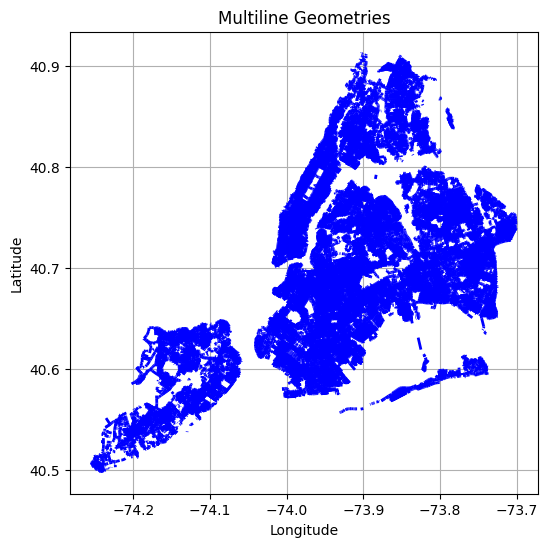

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# plotting pavement data

gdf = gpd.GeoDataFrame(p, geometry='the_geom', crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='blue', linewidth=2)

plt.title('Multiline Geometries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [8]:
# reading and filtering school location data

schools = pd.read_csv('/workspaces/Beans-MLCode/data/school_locs.csv')
schools = schools[['location_code', 'location_name', 'LONGITUDE', 'LATITUDE', 'Police_precinct']]
schools = schools[schools['LONGITUDE'] != 0]
schools.head()

,location_code,location_name,LONGITUDE,LATITUDE,Police_precinct
0,K001,P.S. 001 The Bergen,-74.011420,40.648959,72.0
1,K002,Parkside Preparatory Academy,-73.951575,40.656423,71.0
2,K003,P.S. 003 The Bedford Village,-73.955219,40.682311,79.0
3,K004,P.S. K004,-73.879276,40.658500,75.0
4,K005,P.S. 005 Dr. Ronald McNair,-73.921970,40.685241,81.0


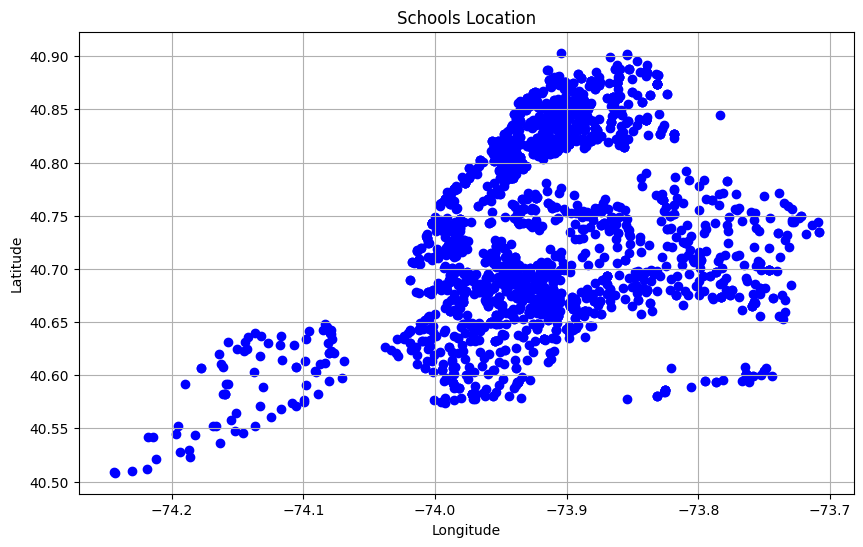

In [9]:
import matplotlib.pyplot as plt

# plotting school location data

plt.figure(figsize=(10, 6))
plt.scatter(schools['LONGITUDE'], schools['LATITUDE'], color='blue', marker='o')

plt.title('Schools Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [28]:
import geopandas as gpd

def get_schools_with_ratings(filtered_p, schools, year):
    
    # deletes any bad data
    valid_geometries = filtered_p['the_geom'].notna() & filtered_p['the_geom'].apply(lambda x: 'MULTILINESTRING' in x.wkt)

    # converting both dfs to geometric data type
    pavement_gdf = gpd.GeoDataFrame(
        filtered_p[valid_geometries],
        geometry=filtered_p.loc[valid_geometries, 'the_geom'],
        crs='EPSG:4326'
    )

    schools_gdf = gpd.GeoDataFrame(
        schools,
        geometry=gpd.points_from_xy(schools['LONGITUDE'], schools['LATITUDE']),
        crs='EPSG:4326'
    )

    schools_gdf = schools_gdf.to_crs('EPSG:3857')

    # adding buffer -- includes streets within 1 mile of schools
    schools_gdf['geometry'] = schools_gdf.geometry.buffer(1600)

    pavement_gdf = pavement_gdf.to_crs('EPSG:3857')

    # merges our data and finds avg ratings
    joined_gdf = gpd.sjoin(schools_gdf, pavement_gdf, how='left', predicate='intersects')

    average_ratings = (joined_gdf.groupby(['location_code', 'location_name'])
                       .agg({'Rating_B': 'mean'})
                       .rename(columns={'Rating_B': 'average_rating'})
                       .reset_index())

    schools_with_ratings = schools_gdf.merge(average_ratings, on=['location_code', 'location_name'], how='left')

    # add time component
    #schools_with_ratings['year'] = year 

    # validation check
    #print(schools_with_ratings.head())

    return schools_with_ratings[['location_code', 'location_name', 'average_rating']]


In [29]:
merged_2017 = get_schools_with_ratings(p[p['RatingFY_S'] == 2017], schools, 2017)
merged_2018 = get_schools_with_ratings(p[p['RatingFY_S'] == 2018], schools, 2018)
merged_2019 = get_schools_with_ratings(p[p['RatingFY_S'] == 2019], schools, 2019)
merged_2021 = get_schools_with_ratings(p[p['RatingFY_S'] == 2021], schools, 2021)
merged_2022 = get_schools_with_ratings(p[p['RatingFY_S'] == 2022], schools, 2022)
merged_2023 = get_schools_with_ratings(p[p['RatingFY_S'] == 2023], schools, 2023)

In [30]:
merged_2017['year'] = 2017
merged_2018['year'] = 2018
merged_2019['year'] = 2019
merged_2021['year'] = 2021
merged_2022['year'] = 2022
merged_2023['year'] = 2023

In [31]:
# combining final data

all_merged = pd.concat([
    merged_2017, 
    merged_2018, 
    merged_2019, 
    merged_2021, 
    merged_2022, 
    merged_2023
], ignore_index=True)

In [32]:
survey = pd.read_csv('/workspaces/Beans-MLCode/data/survey.csv')

In [33]:
final_df = pd.merge(
    all_merged, 
    survey, 
    how='inner', 
    left_on=['location_name', 'year'],  # Merging on both location_name and year from all_merged
    right_on=['School Name', 'year']    # Merging on School Name and year from survey
)

In [35]:
print(final_df.shape)
print(final_df)
final_df.head()

(6187, 25)
     location_code                            location_name  average_rating  \
0             K001                      P.S. 001 The Bergen        6.833333   
1             K002             Parkside Preparatory Academy        8.000000   
2             K003             P.S. 003 The Bedford Village        6.000000   
3             K004                                P.S. K004        6.800000   
4             K006              Norma Adams Clemons Academy        7.000000   
...            ...                                      ...             ...   
6182          X754  J. M. Rapport School Career Development        6.992000   
6183          X811                                P.S. X811        7.601504   
6184          X811                                P.S. X811        7.601504   
6185          X811                                P.S. X811        7.601504   
6186          X811                                P.S. X811        7.601504   

      year     DBN                      

,location_code,location_name,average_rating,year,DBN,School Name,Total Parent Response Rate,Q1,Q2,Q3,...,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,K001,P.S. 001 The Bergen,6.833333,2017,15K001,P.S. 001 The Bergen,37%,94%,94%,98%,...,98%,96%,96%,96%,96%,98%,94%,94%,96%,89%
1,K002,Parkside Preparatory Academy,8.000000,2017,17K002,Parkside Preparatory Academy,38%,87%,90%,97%,...,92%,92%,89%,97%,95%,91%,94%,95%,94%,88%
2,K003,P.S. 003 The Bedford Village,6.000000,2017,13K003,P.S. 003 The Bedford Village,40%,92%,96%,99%,...,96%,97%,96%,98%,98%,98%,98%,96%,98%,89%
3,K004,P.S. K004,6.800000,2017,75K004,P.S. K004,65%,98%,99%,98%,...,98%,97%,99%,97%,99%,99%,99%,96%,97%,91%
4,K006,Norma Adams Clemons Academy,7.000000,2017,17K006,Norma Adams Clemons Academy,49%,90%,90%,95%,...,91%,90%,90%,89%,90%,94%,92%,91%,96%,90%


In [ ]:
final_df.to_csv('final_df.csv', index=False)